In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
data = pd.read_csv("final_with_weather.csv")
data.drop(['Month'], axis =1, inplace= True)
data.set_index("pickuptime", inplace= True)
num_pickups = data.total
num_green_pickups = data.green
num_yellow_pickups = data.yellow
data.drop(['green', 'yellow', 'total'], axis =1, inplace = True)

In [4]:
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace = True)
        
    return agg

In [5]:
features_and_target = pd.concat([data, num_pickups], axis = 1)
values = features_and_target.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

n_hours = 23

reframed = series_to_supervised(scaled, n_hours, 1)

n_features = features_and_target.shape[1]


In [6]:
# delete significantly wrong data & compare the date value
total_values = reframed.values
n_p = np.argmin(total_values[365*24*3:, -1])
n_p = n_p + 365*24*3

a = total_values[: n_p, :]
b = total_values[n_p + n_hours + 1 : , :]
total_values = np.concatenate((a, b), axis=0)

# result variable
result = np.zeros((4, 7))

Train on 3754 samples, validate on 910 samples
Epoch 1/100
 - 3s - loss: 0.1565 - val_loss: 0.0811
Epoch 2/100
 - 2s - loss: 0.1055 - val_loss: 0.0790
Epoch 3/100
 - 2s - loss: 0.0933 - val_loss: 0.0714
Epoch 4/100
 - 1s - loss: 0.0890 - val_loss: 0.0661
Epoch 5/100
 - 1s - loss: 0.0856 - val_loss: 0.0622
Epoch 6/100
 - 1s - loss: 0.0815 - val_loss: 0.0578
Epoch 7/100
 - 1s - loss: 0.0777 - val_loss: 0.0547
Epoch 8/100
 - 1s - loss: 0.0729 - val_loss: 0.0498
Epoch 9/100
 - 2s - loss: 0.0683 - val_loss: 0.0448
Epoch 10/100
 - 2s - loss: 0.0648 - val_loss: 0.0424
Epoch 11/100
 - 2s - loss: 0.0623 - val_loss: 0.0409
Epoch 12/100
 - 2s - loss: 0.0592 - val_loss: 0.0383
Epoch 13/100
 - 2s - loss: 0.0571 - val_loss: 0.0366
Epoch 14/100
 - 2s - loss: 0.0552 - val_loss: 0.0346
Epoch 15/100
 - 2s - loss: 0.0548 - val_loss: 0.0327
Epoch 16/100
 - 2s - loss: 0.0531 - val_loss: 0.0325
Epoch 17/100
 - 2s - loss: 0.0524 - val_loss: 0.0305
Epoch 18/100
 - 2s - loss: 0.0498 - val_loss: 0.0298
Epoch 19

 - 1s - loss: 0.0285 - val_loss: 0.0216
Epoch 55/100
 - 1s - loss: 0.0290 - val_loss: 0.0218
Epoch 56/100
 - 1s - loss: 0.0288 - val_loss: 0.0218
Epoch 57/100
 - 1s - loss: 0.0295 - val_loss: 0.0215
Epoch 58/100
 - 1s - loss: 0.0295 - val_loss: 0.0218
Epoch 59/100
 - 1s - loss: 0.0301 - val_loss: 0.0212
Epoch 60/100
 - 1s - loss: 0.0304 - val_loss: 0.0211
Epoch 61/100
 - 1s - loss: 0.0288 - val_loss: 0.0206
Epoch 62/100
 - 1s - loss: 0.0290 - val_loss: 0.0205
Epoch 63/100
 - 1s - loss: 0.0289 - val_loss: 0.0205
Epoch 64/100
 - 1s - loss: 0.0279 - val_loss: 0.0204
Epoch 65/100
 - 1s - loss: 0.0268 - val_loss: 0.0205
Epoch 66/100
 - 1s - loss: 0.0258 - val_loss: 0.0201
Epoch 67/100
 - 1s - loss: 0.0249 - val_loss: 0.0200
Epoch 68/100
 - 2s - loss: 0.0242 - val_loss: 0.0199
Epoch 69/100
 - 2s - loss: 0.0241 - val_loss: 0.0201
Epoch 70/100
 - 2s - loss: 0.0238 - val_loss: 0.0201
Epoch 71/100
 - 2s - loss: 0.0232 - val_loss: 0.0196
Epoch 72/100
 - 1s - loss: 0.0230 - val_loss: 0.0197
Epoch 

Epoch 8/100
 - 1s - loss: 0.0875 - val_loss: 0.0734
Epoch 9/100
 - 1s - loss: 0.0838 - val_loss: 0.0683
Epoch 10/100
 - 1s - loss: 0.0784 - val_loss: 0.0613
Epoch 11/100
 - 1s - loss: 0.0732 - val_loss: 0.0536
Epoch 12/100
 - 1s - loss: 0.0678 - val_loss: 0.0486
Epoch 13/100
 - 1s - loss: 0.0622 - val_loss: 0.0470
Epoch 14/100
 - 1s - loss: 0.0573 - val_loss: 0.0420
Epoch 15/100
 - 1s - loss: 0.0543 - val_loss: 0.0415
Epoch 16/100
 - 1s - loss: 0.0558 - val_loss: 0.0426
Epoch 17/100
 - 1s - loss: 0.0485 - val_loss: 0.0353
Epoch 18/100
 - 1s - loss: 0.0506 - val_loss: 0.0391
Epoch 19/100
 - 1s - loss: 0.0452 - val_loss: 0.0335
Epoch 20/100
 - 1s - loss: 0.0472 - val_loss: 0.0360
Epoch 21/100
 - 1s - loss: 0.0424 - val_loss: 0.0324
Epoch 22/100
 - 2s - loss: 0.0446 - val_loss: 0.0337
Epoch 23/100
 - 1s - loss: 0.0408 - val_loss: 0.0313
Epoch 24/100
 - 1s - loss: 0.0416 - val_loss: 0.0320
Epoch 25/100
 - 1s - loss: 0.0396 - val_loss: 0.0310
Epoch 26/100
 - 2s - loss: 0.0397 - val_loss: 0.

Epoch 62/100
 - 1s - loss: 0.0271 - val_loss: 0.0234
Epoch 63/100
 - 1s - loss: 0.0272 - val_loss: 0.0234
Epoch 64/100
 - 1s - loss: 0.0251 - val_loss: 0.0240
Epoch 65/100
 - 1s - loss: 0.0263 - val_loss: 0.0225
Epoch 66/100
 - 1s - loss: 0.0252 - val_loss: 0.0231
Epoch 67/100
 - 1s - loss: 0.0245 - val_loss: 0.0230
Epoch 68/100
 - 1s - loss: 0.0246 - val_loss: 0.0236
Epoch 69/100
 - 1s - loss: 0.0244 - val_loss: 0.0238
Epoch 70/100
 - 1s - loss: 0.0249 - val_loss: 0.0226
Epoch 71/100
 - 1s - loss: 0.0243 - val_loss: 0.0226
Epoch 72/100
 - 2s - loss: 0.0238 - val_loss: 0.0231
Epoch 73/100
 - 2s - loss: 0.0236 - val_loss: 0.0233
Epoch 74/100
 - 2s - loss: 0.0241 - val_loss: 0.0242
Epoch 75/100
 - 2s - loss: 0.0244 - val_loss: 0.0237
Epoch 76/100
 - 2s - loss: 0.0238 - val_loss: 0.0238
Epoch 77/100
 - 1s - loss: 0.0241 - val_loss: 0.0231
Epoch 78/100
 - 2s - loss: 0.0233 - val_loss: 0.0226
Epoch 79/100
 - 2s - loss: 0.0226 - val_loss: 0.0224
Epoch 80/100
 - 2s - loss: 0.0218 - val_loss: 

 - 1s - loss: 0.0550 - val_loss: 0.0405
Epoch 16/100
 - 2s - loss: 0.0523 - val_loss: 0.0385
Epoch 17/100
 - 1s - loss: 0.0498 - val_loss: 0.0366
Epoch 18/100
 - 2s - loss: 0.0474 - val_loss: 0.0348
Epoch 19/100
 - 2s - loss: 0.0456 - val_loss: 0.0333
Epoch 20/100
 - 2s - loss: 0.0442 - val_loss: 0.0321
Epoch 21/100
 - 1s - loss: 0.0427 - val_loss: 0.0309
Epoch 22/100
 - 2s - loss: 0.0415 - val_loss: 0.0296
Epoch 23/100
 - 1s - loss: 0.0413 - val_loss: 0.0291
Epoch 24/100
 - 1s - loss: 0.0396 - val_loss: 0.0279
Epoch 25/100
 - 1s - loss: 0.0396 - val_loss: 0.0278
Epoch 26/100
 - 1s - loss: 0.0379 - val_loss: 0.0268
Epoch 27/100
 - 1s - loss: 0.0379 - val_loss: 0.0268
Epoch 28/100
 - 1s - loss: 0.0367 - val_loss: 0.0263
Epoch 29/100
 - 1s - loss: 0.0365 - val_loss: 0.0265
Epoch 30/100
 - 1s - loss: 0.0348 - val_loss: 0.0257
Epoch 31/100
 - 1s - loss: 0.0358 - val_loss: 0.0268
Epoch 32/100
 - 1s - loss: 0.0336 - val_loss: 0.0255
Epoch 33/100
 - 1s - loss: 0.0337 - val_loss: 0.0257
Epoch 

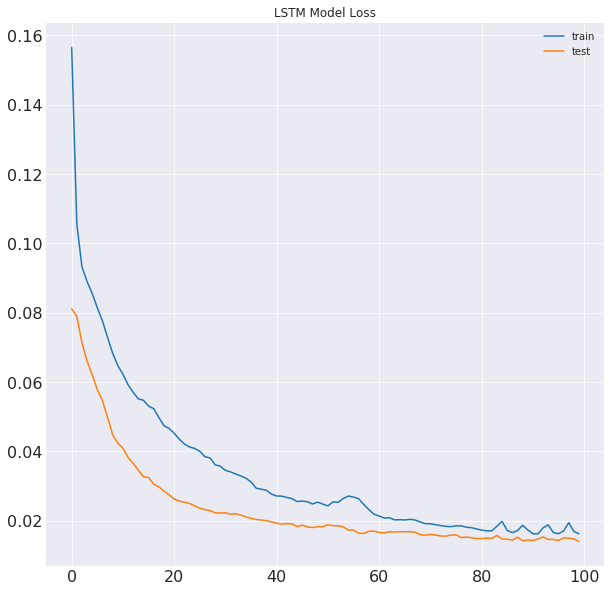

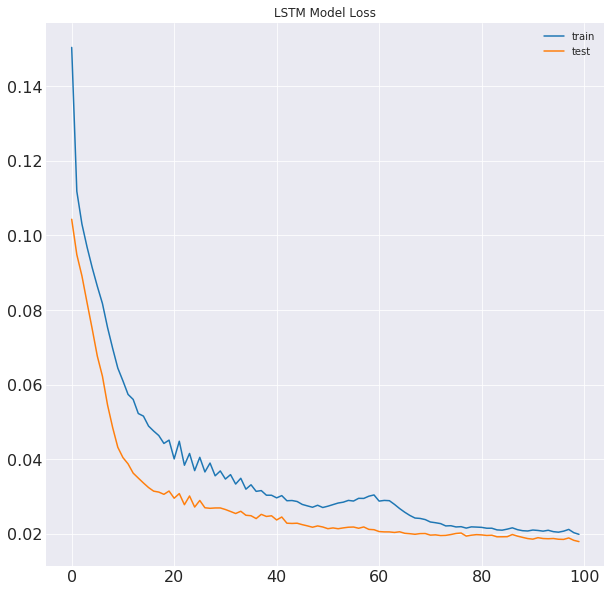

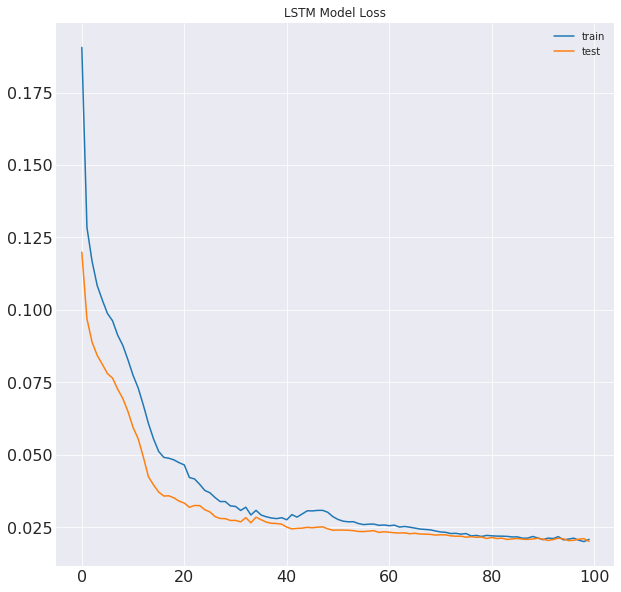

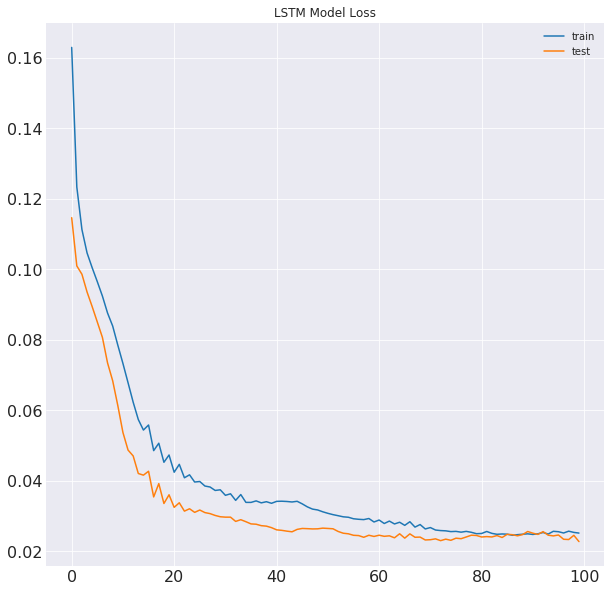

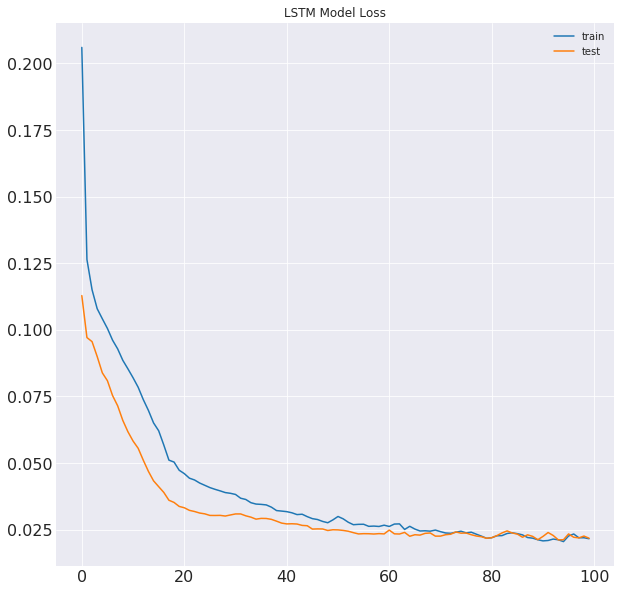

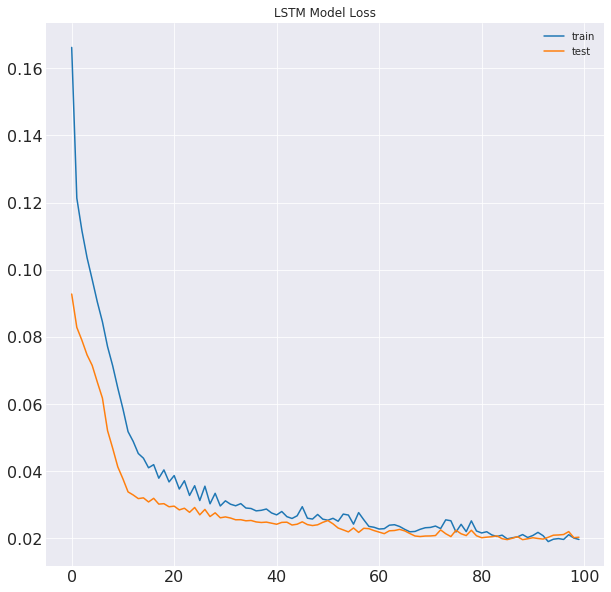

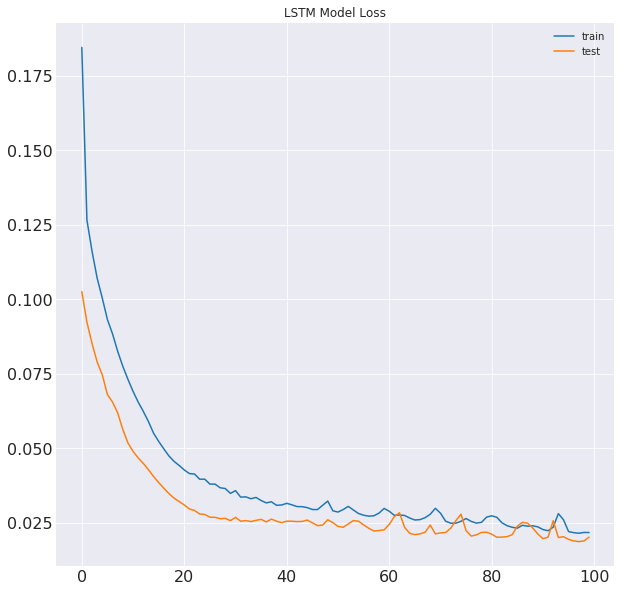

In [9]:
for i in range (7):
    values = total_values[total_values[:, -8] == total_values[120 + 24*i, 5]]
    n_train_hours = 3754
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]
    # split into input and outputs
    n_obs = n_hours * n_features
    train_X, train_y = train[:, :n_obs], train[:, -1]
    test_X, test_y = test[:, :n_obs], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

    # design network
    model = Sequential()
    model.add(LSTM(24, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # fit network
    history = model.fit(train_X, train_y, epochs=100, batch_size=100,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
    
    history_loss = pd.DataFrame()
    history_loss['train'] = history.history['loss']
    history_loss['test'] = history.history['val_loss']
    history_loss.plot(figsize=(10,10), fontsize=16,
                title='LSTM Model Loss');
    
    # make a prediction 
    yhat = model.predict(test_X)
    # reshape back to 2d
    test_X = test_X.reshape((test_X.shape[0], -1))

    # invert scaling for forecast# invert 
    inv_yhat = np.concatenate((test[:, 299:311], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test[:, 299:311], test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    inv_yhat_gte_zero = inv_yhat.copy()
    inv_yhat_gte_zero[inv_yhat_gte_zero < 0] = 0

    # calculate r2
    result[0, i] = r2_score(inv_y, inv_yhat)

    # calculate mean absolute error
    result[1, i] = mean_absolute_error(inv_y, inv_yhat)

    # calculate rmse
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    result[2, i]= rmse

    # calculate mean absolute error percentage
    maep = np.mean(np.abs((inv_y - inv_yhat)/inv_y))*100
    result[3, i] = maep

In [10]:
result[3, :]

array([10.21815017, 13.66645247, 13.6479944 , 13.608706  , 13.39310259,
       10.08810624,  9.81952175])